Mean Absolute Error: 43890.78174727001
Mean Squared Error: 2298071075.5447655
R-squared: -15114652.016610887


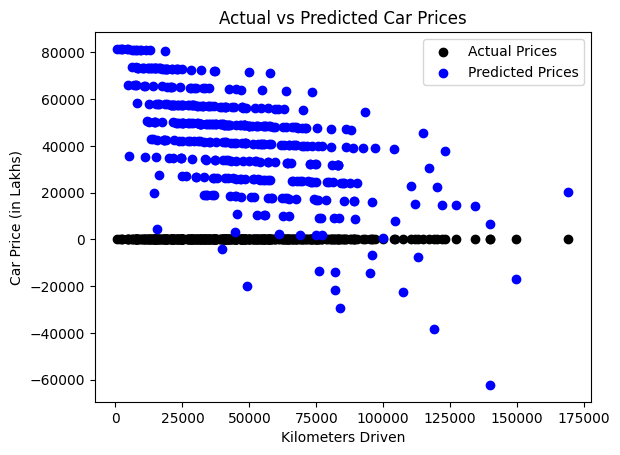

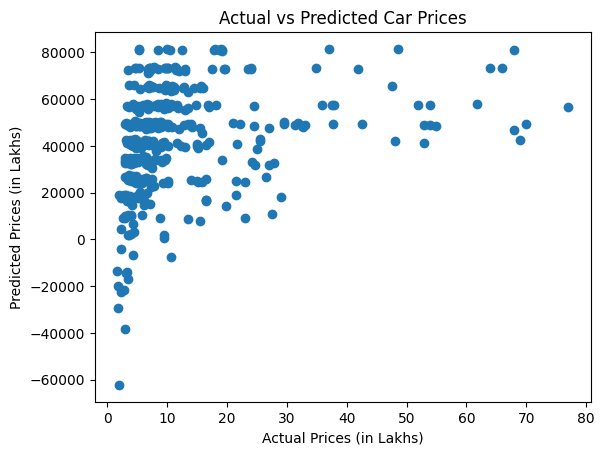

Mean Absolute Error: 43890.78174727001
Mean Squared Error: 2298071075.5447655
R-squared: -15114652.016610887


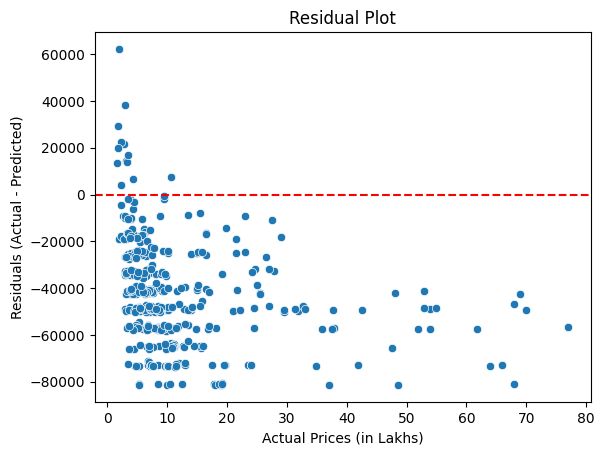

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('/content/used_car_dataset.csv')
# Data cleaning
#df['car_price_in_rupees'] = df['car_price_in_rupees'].str.replace('₹', '').str.replace(' Lakh', '').str.replace(',', '').astype(float)
df['car_price_in_rupees'] = df['car_price_in_rupees'].str.replace('₹', '').str.replace(' Lakh', '').str.replace(' Crore', 'e7').str.replace(',', '').astype(float)
df['kms_driven'] = df['kms_driven'].str.replace(' km', '').str.replace(',', '').astype(float)

# Feature engineering
current_year = 2023  # You can replace this with the actual current year
df['car_age'] = current_year - df['year_of_manufacture']

# Model selection
X = df[['kms_driven', 'year_of_manufacture', 'car_age']]
y = df['car_price_in_rupees']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model assessment
y_pred = model.predict(X_test)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Model evaluation
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualization
plt.scatter(X_test['kms_driven'], y_test, color='black', label='Actual Prices')
plt.scatter(X_test['kms_driven'], y_pred, color='blue', label='Predicted Prices')
plt.xlabel('Kilometers Driven')
plt.ylabel('Car Price (in Lakhs)')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()



import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices (in Lakhs)')
plt.ylabel('Predicted Prices (in Lakhs)')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Model evaluation
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualization of Residuals
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Prices (in Lakhs)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


Mean Absolute Error: 3974.2172892602084
Mean Squared Error: 28512029.447667055
R-squared: 0.8296493811059147


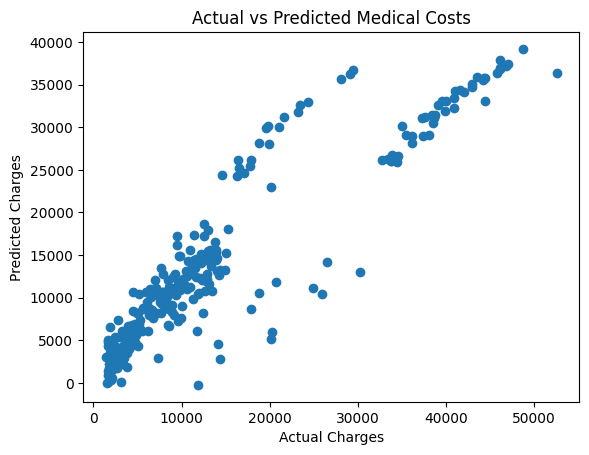

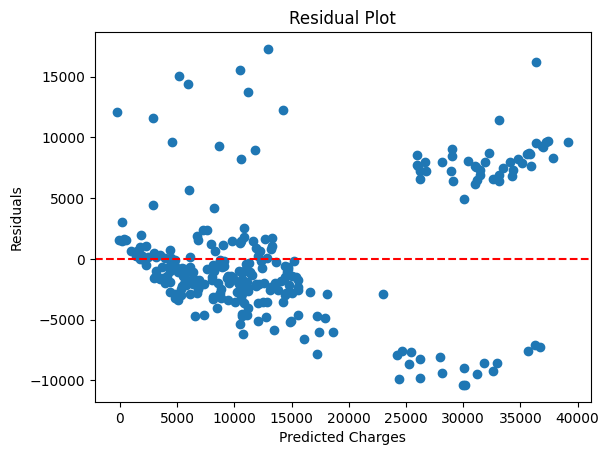

In [ ]:
# Step 1: Objective - Develop a model to predict medical costs.

# Step 2: Data Preparation
# 2.1 Collect a dataset of medical cost records
# Assuming your dataset is in a CSV file named 'medical_costs.csv'
import pandas as pd

df = pd.read_csv('/content/insurance.csv')

# 2.2 Handle data cleaning
# Handling missing values
df = df.dropna()

# Handling outliers in 'charges' column (you may need to adjust this based on your data)
df = df[(df['charges'] > 1000) & (df['charges'] < 60000)]

# 2.3 Encode categorical variables and normalize numerical features
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Normalizing numerical features (you may choose a different method based on your data)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['age', 'bmi', 'children']] = scaler.fit_transform(df_encoded[['age', 'bmi', 'children']])

# Step 3: Model Choice
# 3.1 Select a suitable regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Step 4: Training and Evaluation
# 4.1 Split the data (common ratios are 70-30 or 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4.3 Assess the model's performance using appropriate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 5: Model Evaluation
# 5a. Evaluate the model's ability to predict medical costs using the testing dataset
# (Already done in the evaluation metrics above)

# 5b. Visualize results and interpret them for insights
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Costs')
plt.show()



# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Step 5: Model Evaluation
# 5a. Evaluate the model's ability to predict medical costs using the testing dataset
# (Already done in the evaluation metrics above)

# 5b. Visualize results and interpret them for insights
import matplotlib.pyplot as plt



# Residual plot for understanding errors
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Interpretation and Insights

if isinstance(model, (DecisionTreeRegressor)):
    feature_importance = model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Bar plot of feature importance
    plt.bar(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.xticks(rotation=45)
    plt.show()
